**Objective**
- Perform **KMeans Clustering** to group customers by **Customer Profiles**
- Exploring customer behavior, identifying potential customer segments, and analysing purchasing patterns and trends
- To determine promotional techniques that could be applied to individual customers to improve sales

**About the Data**:
This dataset contains information about 10,000 grocery shoppers. The data includes demographic and behavioral attributes 
that can be used for customer segmentation, trend analysis, and other forms of business analysis.

1. **CustomerID**: A unique identifier for each customer. This is a sequential number starting from 101.
2. **Age**: The age of the customer, ranging from 18 to 80 years. This is randomly generated.
3. **Location_Type**: The type of location where the customer resides. The values are selected randomly from 'Urban', 'Suburban', and 'Rural'.
4. **Household_Size**: The number of people in the customer's household. Values are randomly chosen from 1 to 6.
5. **Days_Since_Last_Purchase**: The number of days since the customer's most recent purchase. This value ranges between 1 and 90 days, chosen randomly.
6. **Monthly_Orders**: The total number of orders placed by the customer in a month. This is a random number between 0 and 20.
7. **Total_Spend_Last_3_Months**: The total amount the customer has spent on groceries in the last three months. This is a random floating-point value between 100 and 5000.
8. **Avg_Session_Duration_Minutes**: The average time the customer spends per session on the grocery website or app, measured in minutes. The value ranges between 1 and 20 minutes.
9. **Preferred_Category**: The category of products the customer most frequently buys. Values include 'Produce', 'Snacks', 'Organic', 'Canned Goods', and 'Dairy', selected randomly.
10. **Coupon_Usage_Rate**: The percentage (between 0 and 1) of purchases made by the customer using coupons. This is a random floating-point number.
11. **Organic_Purchase_Ratio**: The ratio of the customer's total grocery purchases that are organic. This value ranges between 0 and 1.
12. **App_Features_Used**: The app features the customer uses most frequently. The values can be one of the following: 'List+Coupons', 'None', 'List+Recipes', 'Coupons', or 'List'.


#### Install Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#### 1. Example data for dataframe

In [2]:
# Read dataset from CSV file
df = pd.read_csv('data/GroceryShopperData.csv')

# Show information about dataset
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   CustomerID                    100 non-null    int64  
 1   Age                           100 non-null    int64  
 2   Location_Type                 100 non-null    object 
 3   Household_Size                100 non-null    int64  
 4   Days_Since_Last_Purchase      100 non-null    int64  
 5   Monthly_Orders                100 non-null    int64  
 6   Total_Spend_Last_3_Months     100 non-null    float64
 7   Avg_Session_Duration_Minutes  100 non-null    float64
 8   Preferred_Category            100 non-null    object 
 9   Coupon_Usage_Rate             100 non-null    float64
 10  Organic_Purchase_Ratio        100 non-null    float64
 11  App_Features_Used             95 non-null     object 
 12  Cluster                       100 non-null    int64  
dtypes: flo

,CustomerID,Age,Location_Type,Household_Size,Days_Since_Last_Purchase,Monthly_Orders,Total_Spend_Last_3_Months,Avg_Session_Duration_Minutes,Preferred_Category,Coupon_Usage_Rate,Organic_Purchase_Ratio,App_Features_Used,Cluster
0,0,64,Rural,4,70,1,701.30,3.30,Canned Goods,0.62,0.30,List+Coupons,0
1,1,39,Urban,10,5,8,2884.42,10.65,Dairy,0.57,0.27,Coupons,2
2,2,74,Rural,3,48,0,519.26,4.19,Organic,0.67,0.20,List+Recipes,0
3,3,53,Suburban,0,5,4,3719.66,14.60,Organic,0.03,0.99,NaN,1
4,4,56,Urban,2,4,3,3890.06,15.74,Dairy,0.00,1.00,List+Recipes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,61,Rural,7,54,0,1071.22,4.73,Dairy,0.73,0.20,List+Coupons,0
96,96,51,Suburban,2,2,4,4062.65,16.97,Organic,0.36,0.72,Coupons,1
97,97,48,Urban,3,2,3,3445.77,14.47,Organic,0.00,0.72,List+Recipes,1
98,98,53,Urban,1,3,4,3031.21,15.70,Organic,0.09,0.83,List+Recipes,1


#### 2. Prepare Data for KMeans Model

In [3]:
def preprocess_data(X):
    # for numerical columns
    # ---------------------
    # we normalize using MinMaxScaler to constrain values between 0 and 1

    scaler = MinMaxScaler(feature_range = (0,1))
    df_numeric = X.select_dtypes(include=[np.number])
    numeric_cols = df_numeric.columns.values

    for col in numeric_cols:
        # fit_transform() of scaler can be applied to each column individually
        X[col] = scaler.fit_transform(X[[col]])

    # print("---Successfully processed numeric column(s)")
    # print(X.head(5))

    # for categorical columns
    # -----------------------
    # we convert the column into one-hot encoding
    df_categorical = X.select_dtypes(exclude=[np.number])
    categorical_cols = df_categorical.columns.values

    # the function get_dummies() (from pandas) creates one-hot encoding
    X = pd.get_dummies(X,columns=categorical_cols, dtype=int)

    # print("---Successfully processed categorical column(s)")
    # print(X.head(5))

    return X

without_customer_id = df.drop(["CustomerID","Cluster"], axis=1)
preprocess_data = preprocess_data(without_customer_id)

#### 3. Determine Best K Value for KMeans Model

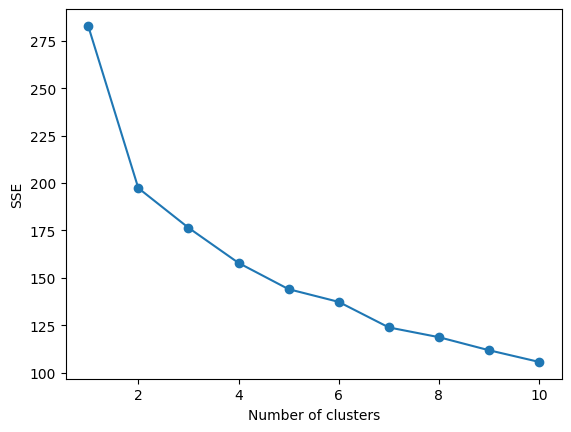

In [4]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(preprocess_data)
    sse.append(kmeans.inertia_)

plt.plot(range(1,11), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')  # Sum of squared errors
plt.show()

Using SSE Elbow Method, we determine that the best K value to use is either 5 or 7. For this case, we will use K = 5

#### 3. Create KMeans Model

In [5]:
# Optimal clusters determined via elbow method
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(preprocess_data)

# Assess performance of model
print(f"Labels of each point: {kmeans.labels_}")
print(f"SSE: {kmeans.inertia_}")
print(f"Number of iterations ran: {kmeans.n_iter_}")

Labels of each point: [0 2 0 1 1 0 1 1 0 1 0 2 0 1 1 2 1 1 1 1 1 2 0 0 1 2 0 0 2 0 0 1 2 2 1 1 1
 0 1 0 0 0 1 2 1 1 1 1 1 0 0 1 2 0 0 0 0 1 1 1 0 0 0 0 1 1 1 0 0 2 0 1 0 0
 0 1 1 1 1 1 2 1 1 0 0 1 1 0 1 1 1 0 2 1 2 0 1 1 1 1]
SSE: 176.40592287371393
Number of iterations ran: 3


In [6]:
# Assign Labels to Original Data
df['Clusters'] = kmeans.labels_
df

,CustomerID,Age,Location_Type,Household_Size,Days_Since_Last_Purchase,Monthly_Orders,Total_Spend_Last_3_Months,Avg_Session_Duration_Minutes,Preferred_Category,Coupon_Usage_Rate,Organic_Purchase_Ratio,App_Features_Used,Cluster,Clusters
0,0,64,Rural,4,70,1,701.30,3.30,Canned Goods,0.62,0.30,List+Coupons,0,0
1,1,39,Urban,10,5,8,2884.42,10.65,Dairy,0.57,0.27,Coupons,2,2
2,2,74,Rural,3,48,0,519.26,4.19,Organic,0.67,0.20,List+Recipes,0,0
3,3,53,Suburban,0,5,4,3719.66,14.60,Organic,0.03,0.99,NaN,1,1
4,4,56,Urban,2,4,3,3890.06,15.74,Dairy,0.00,1.00,List+Recipes,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,61,Rural,7,54,0,1071.22,4.73,Dairy,0.73,0.20,List+Coupons,0,0
96,96,51,Suburban,2,2,4,4062.65,16.97,Organic,0.36,0.72,Coupons,1,1
97,97,48,Urban,3,2,3,3445.77,14.47,Organic,0.00,0.72,List+Recipes,1,1
98,98,53,Urban,1,3,4,3031.21,15.70,Organic,0.09,0.83,List+Recipes,1,1


In [7]:
cluster_profile = df.groupby('Clusters').agg({
    'Age': 'mean',
    'Household_Size': 'mean',
    'Days_Since_Last_Purchase': 'mean',
    'Monthly_Orders': 'mean',
    'Total_Spend_Last_3_Months': 'mean',
    'Avg_Session_Duration_Minutes': 'mean',
    'Coupon_Usage_Rate': 'mean',
    'Organic_Purchase_Ratio': 'mean',
}).reset_index()

cluster_profile

,Clusters,Age,Household_Size,Days_Since_Last_Purchase,Monthly_Orders,Total_Spend_Last_3_Months,Avg_Session_Duration_Minutes,Coupon_Usage_Rate,Organic_Purchase_Ratio
0,0,68.486486,4.783784,58.567568,0.540541,732.095135,4.506216,0.830541,0.178108
1,1,44.285714,2.346939,3.551020,4.183673,3216.390204,14.664898,0.135102,0.762653
2,2,39.571429,5.500000,10.642857,6.071429,1777.032143,9.710000,0.481429,0.297857


Based on the clustering analysis, it appears that there are 3 groups of customers

**Customer Profiles**
Cluster Number   | Cluster Profile | Key Characteristics | Business Action |
| --- | --- | ----- | --- |
0 | **Older Shoppers** |	Large Households, Low Frequency, High Coupon Usage  |   Physical Coupons, Bulk Purchase Discounts
1 | **Middle-Aged Shoppers** |	Small Household, High Frequency and Spending, Higher App Usage, High Organic Purchase Ratio	 |  Bulk Purchase Discounts, Flash Sales, Promote Organic Products
2 | **Multi Generation Households Shoppers**	|   Large Households, Moderate Purchase Frequency, Higher Monthly Orders, Potentially Mix of Cluster 1 and 2 in Household |   Family-Oriented Bulk Promotions, Digital Coupons